In [1]:
cd ..

/home/spotlight/git/deeplearning-seminar/code


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from Network import VAE

In [6]:
arch = [784,512,512,2]

In [7]:
v = VAE.VAE(arch=arch, name='784-512-512-2-new')

Building tensorflow graph with the following hyper parameters:
	batch_size: 128
	learning_rate: 0.001
	nonlin: <function relu at 0x7f2f44ba2d90>
	squash: <function sigmoid at 0x7f2f44d0c950>
	arch: [784, 512, 512, 2]
With the following network architecture: [784,512,512,2]
Done constructing network


In [8]:
v.saver

In [9]:
import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
v.train(mnist, num_epochs=300, plot_manifold = False)

[**] Begin training: 17:34:23.778857


InternalError: Blas SGEMM launch failed : a.shape=(128, 784), b.shape=(784, 512), m=128, n=512, k=784
	 [[Node: fully_connected/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](flatten/reshape/Reshape, fully_connected/weights/read)]]
	 [[Node: random_normal/_1 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_384_random_normal", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'fully_connected/MatMul', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-b92a1b1c2f45>", line 1, in <module>
    v = VAE.VAE(arch=arch, name='784-512-512-2-new')
  File "/home/spotlight/git/deeplearning-seminar/code/Network/VAE.py", line 78, in __init__
    self._build_graph()
  File "/home/spotlight/git/deeplearning-seminar/code/Network/VAE.py", line 147, in _build_graph
    self._build_recognition_graph()
  File "/home/spotlight/git/deeplearning-seminar/code/Network/VAE.py", line 98, in _build_recognition_graph
    layer.fully_connected(i, activation_fn = self.nonlin, weights = tf.contrib.layers.xavier_initializer())
  File "/usr/lib/python3.6/site-packages/prettytensor/pretty_tensor_class.py", line 1970, in method
    result = func(non_seq_layer, *args, **kwargs)
  File "/usr/lib/python3.6/site-packages/prettytensor/pretty_tensor_methods.py", line 355, in __call__
    y = tf.matmul(input_layer, params, transpose_b=transpose_weights)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 1729, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 1442, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Blas SGEMM launch failed : a.shape=(128, 784), b.shape=(784, 512), m=128, n=512, k=784
	 [[Node: fully_connected/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](flatten/reshape/Reshape, fully_connected/weights/read)]]
	 [[Node: random_normal/_1 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_384_random_normal", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [80]:
v.batch_size

128

In [ ]:
#mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
import csv
num_samples = 500000
num_epochs = num_samples // 55000
f = open('data_viz.csv', 'w')
writer = csv.writer(f)
for i in range(0, num_epochs):
    raw, labels = mnist.train.next_batch(55000)
    for raw, label in zip(raw, labels):
        z_mean, z_log_sigma = v.encode(raw.reshape(1, 784))
        data.append([label, z_mean[0][0], z_mean[0][1], z_mean[0][2]])
    print("encoded one epoch worth of data (55000 samples)")
print("lets go")
writer.writerows(data)
print("done writing")
f.close()

In [ ]:
mnist.train.num_examples

In [31]:
raw, labels = mnist.test.next_batch(1)

In [37]:
z = v.encode(raw)
np.set_printoptions(precision=5)

In [54]:
print("dim #20: mean: {}, sigma: {}".format(z[0][0,20], z[1][0,20]))

dim #20: mean: -1.0636762380599976, sigma: -0.6982788443565369


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


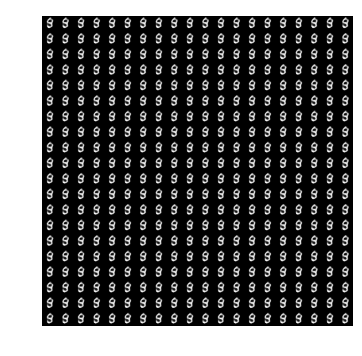

In [16]:
%matplotlib inline
v.plot_manifold(axis=(0,1), range_x=(-3,3), range_y=(-3,3))

In [133]:
x1 = range(0,5)
x2 = range(0,5)
manifold = np.zeros(shape=(len(x1)*28, len(x2)*28))
for i_x, x in enumerate(x1):
    for i_y, y in enumerate(x2):
        img = v.decode()
        manifold[i_x*28:(i_x+1)*28,i_y*28:(i_y+1)*28] = img.reshape(28,28)
plt.imshow(manifold, cmap=plt.cm.gray_r)
plt.axis('off')
plt.tight_layout()
plt.savefig('vae_samples_close_2dim.pdf')

AttributeError: 'Variable' object has no attribute 'decode'

In [151]:
x1 = range(0,5)
x2 = range(0,5)
manifold = np.zeros(shape=(len(x1)*28, len(x2)*28))
for i_x, x in enumerate(x1):
    for i_y, y in enumerate(x2):
        img = v.decode()
        manifold[i_x*28:(i_x+1)*28,i_y*28:(i_y+1)*28] = choice(mnist.test.images).reshape(28,28)
plt.imshow(manifold, cmap=plt.cm.gray_r)
plt.axis('off')
plt.tight_layout()
plt.savefig('mnist_samples_close_2dim.pdf')

ValueError: Fetch argument <tf.Tensor 'fully_connected_4_2/fully_connected/Sigmoid:0' shape=(?, 784) dtype=float32> cannot be interpreted as a Tensor. (Tensor Tensor("fully_connected_4_2/fully_connected/Sigmoid:0", shape=(?, 784), dtype=float32) is not an element of this graph.)

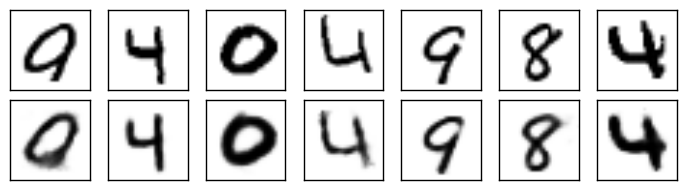

In [120]:
n = 7  # how many digits we will display
mnist.test.next_batch(n)
images = choices(mnist.test.images,k=n)

#plt.axis('off')
#plt.tight_layout()



plt.figure(figsize=(7, 2))
for i in range(n):
    reconstructed = v.end_to_end(images[i].reshape(1,784))
    
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.gray_r)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed.reshape(28, 28), cmap=plt.cm.gray_r)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('reconstructions_2dim.pdf')
plt.show()

In [88]:
from random import choices

In [144]:
sess = tf.Session()
new_saver = tf.train.import_meta_graph('models/784-500-500-2.meta')
new_saver.restore(sess, 'models/784-500-500-2')
all_vars = tf.trainable_variables()
for v in all_vars:
    print(v.name)

fully_connected/weights:0
fully_connected/bias:0
fully_connected_1/weights:0
fully_connected_1/bias:0
z_mean/weights:0
z_mean/bias:0
z_log_sigma/weights:0
z_log_sigma/bias:0
fully_connected_2/weights:0
fully_connected_2/bias:0
fully_connected_3/weights:0
fully_connected_3/bias:0
fully_connected_4/weights:0
fully_connected_4/bias:0
fully_connected/weights:0
fully_connected/bias:0
fully_connected_1/weights:0
fully_connected_1/bias:0
z_mean/weights:0
z_mean/bias:0
z_log_sigma/weights:0
z_log_sigma/bias:0
fully_connected_2/weights:0
fully_connected_2/bias:0
fully_connected_3/weights:0
fully_connected_3/bias:0
fully_connected_4/weights:0
fully_connected_4/bias:0
fully_connected/weights:0
fully_connected/bias:0
fully_connected_1/weights:0
fully_connected_1/bias:0
z_mean/weights:0
z_mean/bias:0
z_log_sigma/weights:0
z_log_sigma/bias:0
fully_connected_2/weights:0
fully_connected_2/bias:0
fully_connected_3/weights:0
fully_connected_3/bias:0
fully_connected_4/weights:0
fully_connected_4/bias:0


In [145]:
sess

In [135]:
sess_2dim = v

In [146]:
v.sess

AttributeError: 'Variable' object has no attribute 'sess'

In [149]:
v.sess = sess

In [150]:
v.decode()

ValueError: Fetch argument <tf.Tensor 'fully_connected_4_2/fully_connected/Sigmoid:0' shape=(?, 784) dtype=float32> cannot be interpreted as a Tensor. (Tensor Tensor("fully_connected_4_2/fully_connected/Sigmoid:0", shape=(?, 784), dtype=float32) is not an element of this graph.)